In [1]:
%matplotlib inline

# Traffic trace

In the following we show how to read and plot the three mobile goodput traces used in the paper. All three traces are based on one trace which was collected while driving in a car through a city and countryside.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [7]:
df = pd.read_csv("../data/traffictraces.csv")

low: 0.33 Mbps mean
medium: 0.67 Mbps mean
high: 1.34 Mbps mean


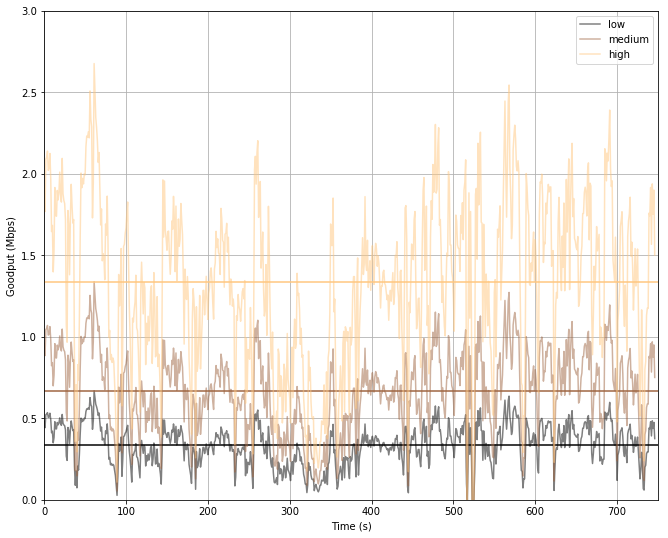

In [12]:
fig = plt.figure(figsize=(11, 9))

ax = fig.add_subplot(111)

cmap = plt.get_cmap('copper') 
colors = iter(cmap(np.linspace(0,1,3)))

traces = ['traffictrace_035', 'traffictrace_070', 'traffictrace_140']
labels = ['low', 'medium', 'high']

for trace, label in zip(traces, labels):
    
    dftrace = df.loc[:,trace] / 1024 / 1024
    
    c = next(colors)
    
    ax.plot(dftrace.index, dftrace, 
            color=c, 
            label=label,
            alpha=0.5)
    
    ax.axhline(dftrace.mean(), color=c)
    
    print("%s: %.2f Mbps mean" % (label, dftrace.mean()))
    
ax.grid()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Goodput (Mbps)")
ax.set_xlim([0, 750])
ax.set_ylim([0, 3])
ax.legend(loc="upper right")